<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_02_08_2021/notebooks/week_2_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
## Loading the customers_per_hour data
data= pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_02_08_2021/customers_per_hour.csv')

Data description- https://github.com/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_26_07_2021/customers_per_hour_desc.txt

In [86]:
data

,Date,Count1,Count2,Count3,Count4,Count5,Count6,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Count22,Count23,Count24
0,2010-12-01,0,0,0,0,0,0,0,0,3,12,9,11,20,12,7,11,9,4,0,0,0,0,0,0
1,2010-12-02,0,0,0,0,0,0,0,2,3,5,10,9,14,11,7,13,10,9,9,2,0,0,0,0
2,2010-12-03,0,0,0,0,0,0,0,0,0,5,6,4,9,6,9,6,3,2,0,0,0,0,0,0
3,2010-12-05,0,0,0,0,0,0,0,0,0,0,8,13,17,16,7,14,4,0,0,0,0,0,0,0
4,2010-12-06,0,0,0,0,0,0,0,0,2,4,11,12,19,13,8,12,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,0,0,0,0,0,0,0,3,5,9,9,18,16,16,11,15,6,0,0,0,0,0,0
301,2011-12-06,0,0,0,0,0,0,0,0,4,6,9,17,25,10,14,8,6,6,0,0,0,0,0,0
302,2011-12-07,0,0,0,0,0,0,0,0,7,7,8,12,20,12,9,11,5,4,0,0,0,0,0,0
303,2011-12-08,0,0,0,0,0,0,0,0,1,9,7,12,19,14,7,14,6,5,7,5,1,0,0,0


# **Week-2** 




# Task-1: Identifying the pattern in dates where data is missing

In [87]:
date=pd.DatetimeIndex(data['Date'])

In [88]:
days=date.day_name()

In [89]:
days.value_counts()

Wednesday    53
Thursday     53
Tuesday      52
Sunday       50
Friday       50
Monday       47
Name: Date, dtype: int64

There is no data for Saturdays

In [90]:
missing_dates=pd.date_range(start='2010-12-01',end='2011-12-09').difference(date)

In [91]:
len(missing_dates)

69

69 days data is missing.

In [92]:
#Missing Days
missing_dates.day_name().value_counts()

Saturday     53
Monday        6
Friday        4
Sunday        3
Thursday      1
Tuesday       1
Wednesday     1
dtype: int64

As observed earlier, all Saturdays are missing. Others are random. We can now check for all months also.

In [93]:
date.month_name().value_counts()

December     28
March        27
October      26
July         26
August       26
June         26
November     26
September    26
May          25
January      24
February     24
April        21
Name: Date, dtype: int64

All months are present here.

In [94]:
missing_dates.month_name().value_counts()

December     12
April         9
January       7
May           6
July          5
October       5
August        5
February      4
March         4
November      4
June          4
September     4
dtype: int64

We can check the missing dates in these months explicitly.

In [95]:
missing_dates

DatetimeIndex(['2010-12-04', '2010-12-11', '2010-12-18', '2010-12-24',
               '2010-12-25', '2010-12-26', '2010-12-27', '2010-12-28',
               '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-01',
               '2011-01-02', '2011-01-03', '2011-01-08', '2011-01-15',
               '2011-01-22', '2011-01-29', '2011-02-05', '2011-02-12',
               '2011-02-19', '2011-02-26', '2011-03-05', '2011-03-12',
               '2011-03-19', '2011-03-26', '2011-04-02', '2011-04-09',
               '2011-04-16', '2011-04-22', '2011-04-23', '2011-04-24',
               '2011-04-25', '2011-04-29', '2011-04-30', '2011-05-02',
               '2011-05-07', '2011-05-14', '2011-05-21', '2011-05-28',
               '2011-05-30', '2011-06-04', '2011-06-11', '2011-06-18',
               '2011-06-25', '2011-07-02', '2011-07-09', '2011-07-16',
               '2011-07-23', '2011-07-30', '2011-08-06', '2011-08-13',
               '2011-08-20', '2011-08-27', '2011-08-29', '2011-09-03',
      

Here 53 Saturdays are missing. There are 16 more missing dates. We can observe that the dates from '2010-12-24' to '2011-01-03' are missing. So, December has 3 Saturdays + 9 consecutive days, total 12 days missing.

January has also 3 consecutive days missing( With the December days) and 4 more Saturdays, total 7 days missing.

In April '2011-04-22' to '2011-04-25' and '2011-04-29' non-Saturday days are missing. Total 9 days are missing.

In May '2011-05-02' (Day after May Day) and '2011-05-30' are missing with 4 Saturdays, total 6 days are missing.

In August only '2011-08-29' non-Saturday is missing with 4 Saturdays. Total 5 days are missing.

July, October has 5 Saturday each. Rest of the months has 4 saturday.

Adding the missing dates--

In [96]:
missing_date=missing_dates.date
missing_date=missing_date.astype(data.Date.dtype)

In [97]:
data_=data.copy()
temp=[[0 for i in range(25)]]
for date in missing_date:
  temp[0][0]=date
  data_=data_.append(pd.DataFrame(temp,columns=data.columns),ignore_index=True)

In [98]:
data_

,Date,Count1,Count2,Count3,Count4,Count5,Count6,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Count22,Count23,Count24
0,2010-12-01,0,0,0,0,0,0,0,0,3,12,9,11,20,12,7,11,9,4,0,0,0,0,0,0
1,2010-12-02,0,0,0,0,0,0,0,2,3,5,10,9,14,11,7,13,10,9,9,2,0,0,0,0
2,2010-12-03,0,0,0,0,0,0,0,0,0,5,6,4,9,6,9,6,3,2,0,0,0,0,0,0
3,2010-12-05,0,0,0,0,0,0,0,0,0,0,8,13,17,16,7,14,4,0,0,0,0,0,0,0
4,2010-12-06,0,0,0,0,0,0,0,0,2,4,11,12,19,13,8,12,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2011-11-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
370,2011-11-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
371,2011-11-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372,2011-11-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
data_['Date']=pd.to_datetime(data_['Date'])

In [100]:
data_.sort_values(by='Date',inplace=True)

In [101]:
data_.Date.is_monotonic_increasing

True

In [102]:
data_.reset_index(drop=True,inplace=True)
data_

,Date,Count1,Count2,Count3,Count4,Count5,Count6,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Count22,Count23,Count24
0,2010-12-01,0,0,0,0,0,0,0,0,3,12,9,11,20,12,7,11,9,4,0,0,0,0,0,0
1,2010-12-02,0,0,0,0,0,0,0,2,3,5,10,9,14,11,7,13,10,9,9,2,0,0,0,0
2,2010-12-03,0,0,0,0,0,0,0,0,0,5,6,4,9,6,9,6,3,2,0,0,0,0,0,0
3,2010-12-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-12-05,0,0,0,0,0,0,0,0,0,0,8,13,17,16,7,14,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2011-12-05,0,0,0,0,0,0,0,0,3,5,9,9,18,16,16,11,15,6,0,0,0,0,0,0
370,2011-12-06,0,0,0,0,0,0,0,0,4,6,9,17,25,10,14,8,6,6,0,0,0,0,0,0
371,2011-12-07,0,0,0,0,0,0,0,0,7,7,8,12,20,12,9,11,5,4,0,0,0,0,0,0
372,2011-12-08,0,0,0,0,0,0,0,0,1,9,7,12,19,14,7,14,6,5,7,5,1,0,0,0


In [103]:
data=data_

# Task-2: Droping the less important columns

In [104]:
df=pd.DataFrame(data.sum())#.drop(index='Date')

In [105]:
df

,0
Count1,0
Count2,0
Count3,0
Count4,0
Count5,0
Count6,0
Count7,1
Count8,28
Count9,502
Count10,1276


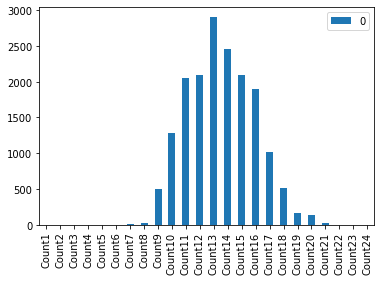

In [106]:
df.plot.bar()

Count1 to Count6 and Count22 to Count24 have 0 values. Count7 has value 1. We can drop these columns, because most of the data is concentrated between Count8 to Count21, that is from 7 AM to 9 PM.

In [107]:
## Dropping less important columns
data.drop(columns=['Count1','Count2','Count3','Count4','Count5','Count6','Count7','Count22','Count23','Count24'],inplace=True)

In [108]:
data

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21
0,2010-12-01,0,3,12,9,11,20,12,7,11,9,4,0,0,0
1,2010-12-02,2,3,5,10,9,14,11,7,13,10,9,9,2,0
2,2010-12-03,0,0,5,6,4,9,6,9,6,3,2,0,0,0
3,2010-12-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-12-05,0,0,0,8,13,17,16,7,14,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2011-12-05,0,3,5,9,9,18,16,16,11,15,6,0,0,0
370,2011-12-06,0,4,6,9,17,25,10,14,8,6,6,0,0,0
371,2011-12-07,0,7,7,8,12,20,12,9,11,5,4,0,0,0
372,2011-12-08,0,1,9,7,12,19,14,7,14,6,5,7,5,1


# Task-3: Assign Quarter for each data point.

In [109]:
data['Quarter']=[pd.to_datetime(date).quarter for date in data['Date']]

In [110]:
data

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
0,2010-12-01,0,3,12,9,11,20,12,7,11,9,4,0,0,0,4
1,2010-12-02,2,3,5,10,9,14,11,7,13,10,9,9,2,0,4
2,2010-12-03,0,0,5,6,4,9,6,9,6,3,2,0,0,0,4
3,2010-12-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,2010-12-05,0,0,0,8,13,17,16,7,14,4,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2011-12-05,0,3,5,9,9,18,16,16,11,15,6,0,0,0,4
370,2011-12-06,0,4,6,9,17,25,10,14,8,6,6,0,0,0,4
371,2011-12-07,0,7,7,8,12,20,12,9,11,5,4,0,0,0,4
372,2011-12-08,0,1,9,7,12,19,14,7,14,6,5,7,5,1,4


In [111]:
data.loc[data.Quarter==1]

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
31,2011-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
32,2011-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
33,2011-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34,2011-01-04,0,0,0,6,5,5,7,6,5,1,0,0,0,0,1
35,2011-01-05,0,0,3,6,7,12,8,1,5,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2011-03-27,0,0,0,5,6,4,4,3,5,4,0,0,0,0,1
117,2011-03-28,1,1,5,5,6,10,5,11,6,3,0,0,0,0,1
118,2011-03-29,0,2,2,4,5,6,10,5,7,3,2,0,0,0,1
119,2011-03-30,0,0,8,7,7,12,11,6,7,4,1,0,0,0,1


In [112]:
data.loc[data.Quarter==2]

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
121,2011-04-01,0,2,5,9,11,8,11,8,3,3,0,0,0,0,2
122,2011-04-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
123,2011-04-03,0,0,0,3,6,3,1,2,3,0,0,0,0,0,2
124,2011-04-04,0,1,3,5,4,16,7,7,3,4,0,0,0,0,2
125,2011-04-05,0,3,3,10,5,7,5,2,6,3,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011-06-26,0,0,0,1,6,3,7,4,3,1,0,0,0,0,2
208,2011-06-27,0,2,2,5,1,11,4,3,2,2,0,0,0,0,2
209,2011-06-28,0,3,1,6,6,3,7,6,7,1,2,0,0,0,2
210,2011-06-29,0,1,4,4,4,7,6,3,5,2,0,0,0,0,2


In [113]:
data.loc[data.Quarter==3]

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
212,2011-07-01,0,3,3,4,3,8,7,3,4,0,1,0,0,0,3
213,2011-07-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
214,2011-07-03,0,0,0,4,2,7,6,1,2,2,0,0,0,0,3
215,2011-07-04,0,0,0,3,4,7,6,2,7,3,0,0,0,0,3
216,2011-07-05,0,0,9,8,6,15,7,6,6,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2011-09-26,1,1,3,8,6,12,11,9,8,3,2,0,0,0,3
300,2011-09-27,0,1,6,14,14,11,7,8,5,1,2,0,0,0,3
301,2011-09-28,0,1,4,10,6,14,10,11,12,7,0,0,0,0,3
302,2011-09-29,0,3,10,10,5,11,16,8,10,8,7,5,1,0,3


In [114]:
data.loc[data.Quarter==4]

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
0,2010-12-01,0,3,12,9,11,20,12,7,11,9,4,0,0,0,4
1,2010-12-02,2,3,5,10,9,14,11,7,13,10,9,9,2,0,4
2,2010-12-03,0,0,5,6,4,9,6,9,6,3,2,0,0,0,4
3,2010-12-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,2010-12-05,0,0,0,8,13,17,16,7,14,4,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2011-12-05,0,3,5,9,9,18,16,16,11,15,6,0,0,0,4
370,2011-12-06,0,4,6,9,17,25,10,14,8,6,6,0,0,0,4
371,2011-12-07,0,7,7,8,12,20,12,9,11,5,4,0,0,0,4
372,2011-12-08,0,1,9,7,12,19,14,7,14,6,5,7,5,1,4


# Task-4: Boxplot for all hours from 7 AM to 9 PM for all Quarter

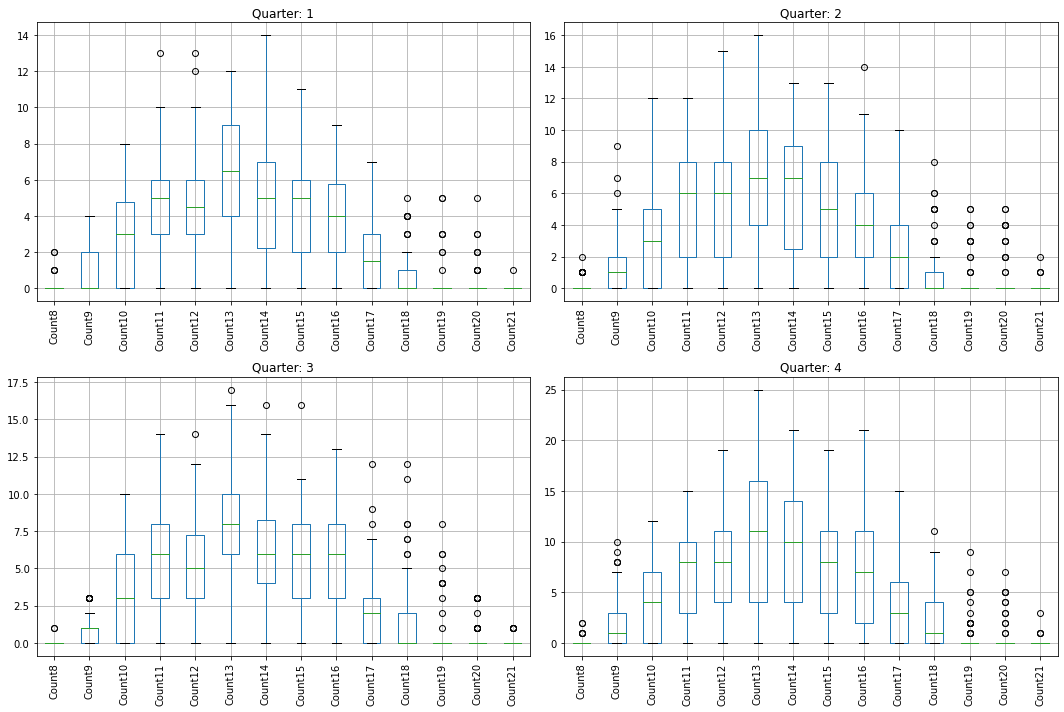

In [115]:
columns=['Count'+str(i) for i in range(8,22)]
plt.figure(figsize=(15,10))
for i in range(1,5):
  plt.subplot(2,2,i)
  plt.tight_layout()
  data.loc[data.Quarter==i].boxplot(column=columns,rot=90)
  plt.title('Quarter: '+ str(i))

# Task-5: Plot moving average

In [116]:
data

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
0,2010-12-01,0,3,12,9,11,20,12,7,11,9,4,0,0,0,4
1,2010-12-02,2,3,5,10,9,14,11,7,13,10,9,9,2,0,4
2,2010-12-03,0,0,5,6,4,9,6,9,6,3,2,0,0,0,4
3,2010-12-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,2010-12-05,0,0,0,8,13,17,16,7,14,4,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2011-12-05,0,3,5,9,9,18,16,16,11,15,6,0,0,0,4
370,2011-12-06,0,4,6,9,17,25,10,14,8,6,6,0,0,0,4
371,2011-12-07,0,7,7,8,12,20,12,9,11,5,4,0,0,0,4
372,2011-12-08,0,1,9,7,12,19,14,7,14,6,5,7,5,1,4


In [117]:
moving_avg=data[['Date','Count8']].copy()
moving_avg.columns=['Date','Avg8']
prev_sum=moving_avg['Avg8'].copy()
for i in range(13):
  prev_sum=prev_sum+data['Count'+str(9+i)]
  moving_avg['Avg'+str(9+i)]=prev_sum/(i+1)

In [118]:
moving_avg=moving_avg.set_index('Date')

In [119]:
moving_avg

,Avg8,Avg9,Avg10,Avg11,Avg12,Avg13,Avg14,Avg15,Avg16,Avg17,Avg18,Avg19,Avg20,Avg21
Date,,,,,,,,,,,,,,
2010-12-01,0,3.0,7.5,8.000000,8.75,11.0,11.166667,10.571429,10.625,10.444444,9.8,8.909091,8.166667,7.538462
2010-12-02,2,5.0,5.0,6.666667,7.25,8.6,9.000000,8.714286,9.250,9.333333,9.3,9.272727,8.666667,8.000000
2010-12-03,0,0.0,2.5,3.666667,3.75,4.8,5.000000,5.571429,5.625,5.333333,5.0,4.545455,4.166667,3.846154
2010-12-04,0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000
2010-12-05,0,0.0,0.0,2.666667,5.25,7.6,9.000000,8.714286,9.375,8.777778,7.9,7.181818,6.583333,6.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0,3.0,4.0,5.666667,6.50,8.8,10.000000,10.857143,10.875,11.333333,10.8,9.818182,9.000000,8.307692
2011-12-06,0,4.0,5.0,6.333333,9.00,12.2,11.833333,12.142857,11.625,11.000000,10.5,9.545455,8.750000,8.076923
2011-12-07,0,7.0,7.0,7.333333,8.50,10.8,11.000000,10.714286,10.750,10.111111,9.5,8.636364,7.916667,7.307692


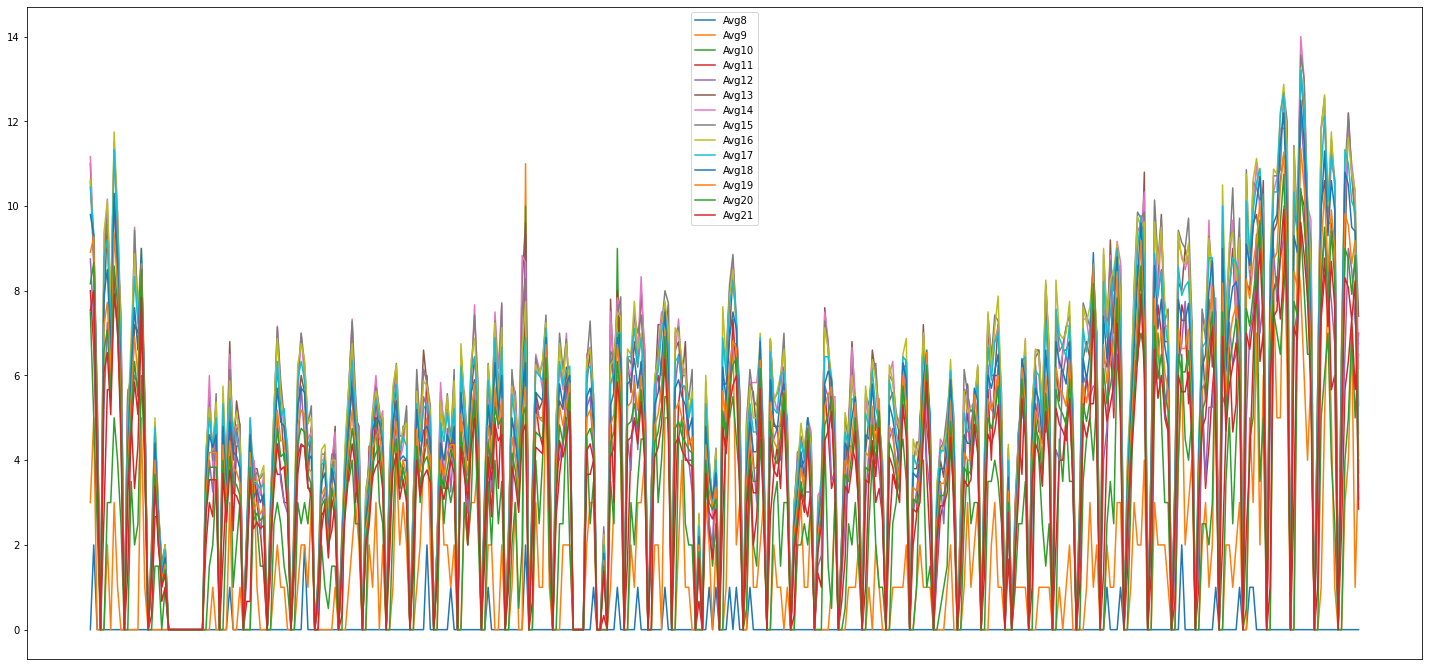

In [120]:
fig=plt.figure(figsize=(25,12))
plt.xticks(range(15,301,15),rotation=90)
plt.plot(moving_avg)
plt.legend(moving_avg.columns)
#plt.show()

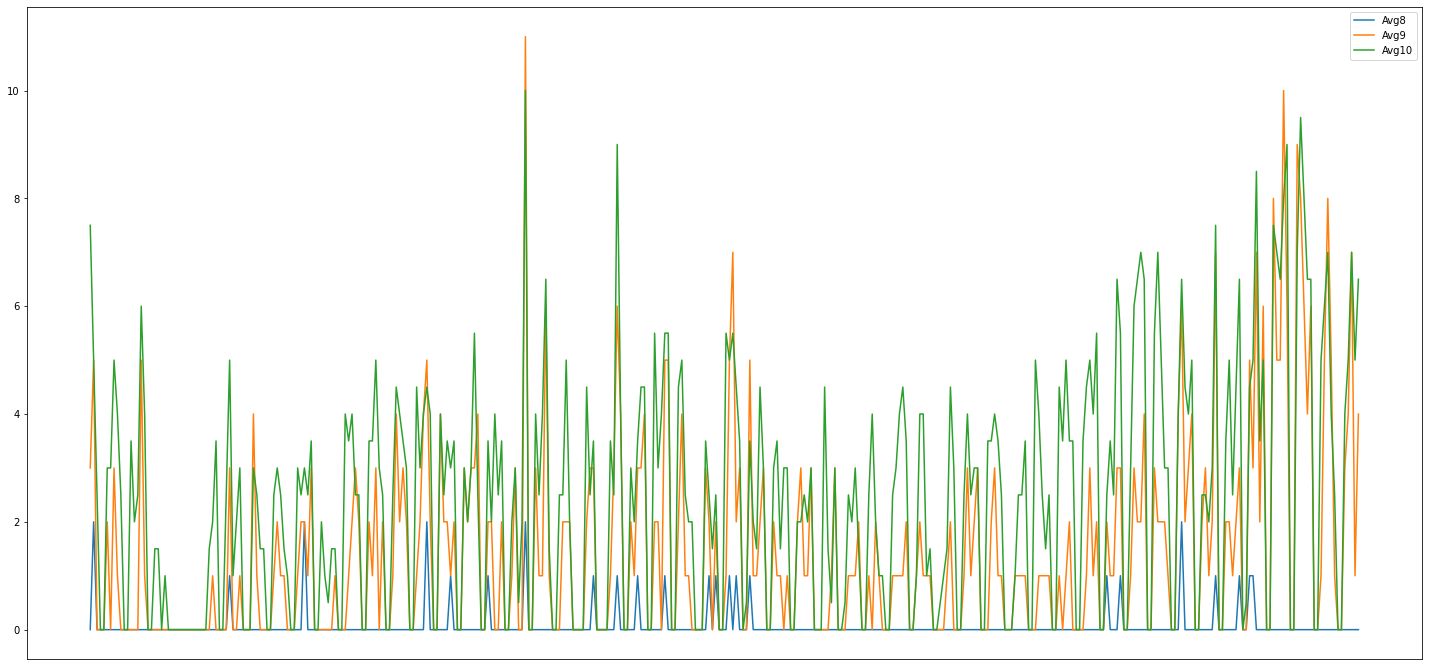

In [121]:
fig=plt.figure(figsize=(25,12))
plt.xticks(range(15,301,15),rotation=90)
plt.plot(moving_avg[['Avg8','Avg9','Avg10']])
plt.legend(['Avg8','Avg9','Avg10'])
#plt.show()

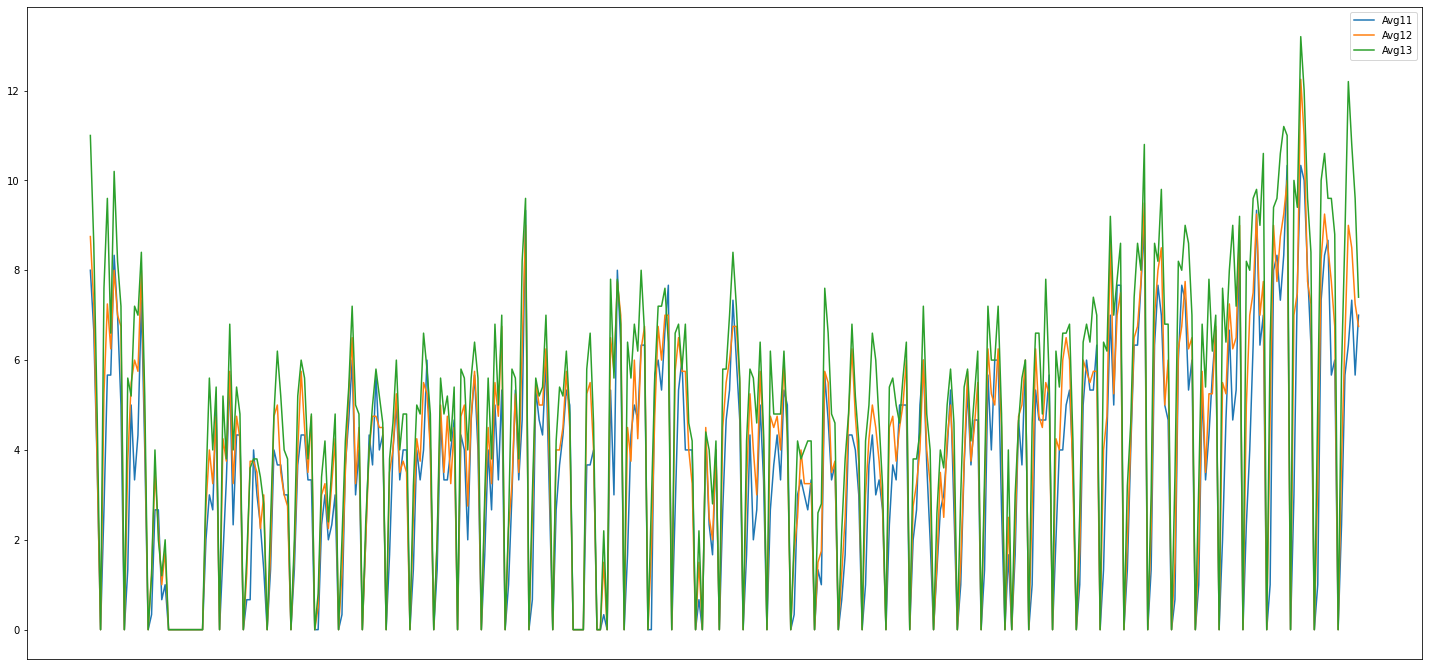

In [122]:
fig=plt.figure(figsize=(25,12))
plt.xticks(range(15,301,15),rotation=90)
plt.plot(moving_avg[['Avg11','Avg12','Avg13']])
plt.legend(['Avg11','Avg12','Avg13'])
#plt.show()

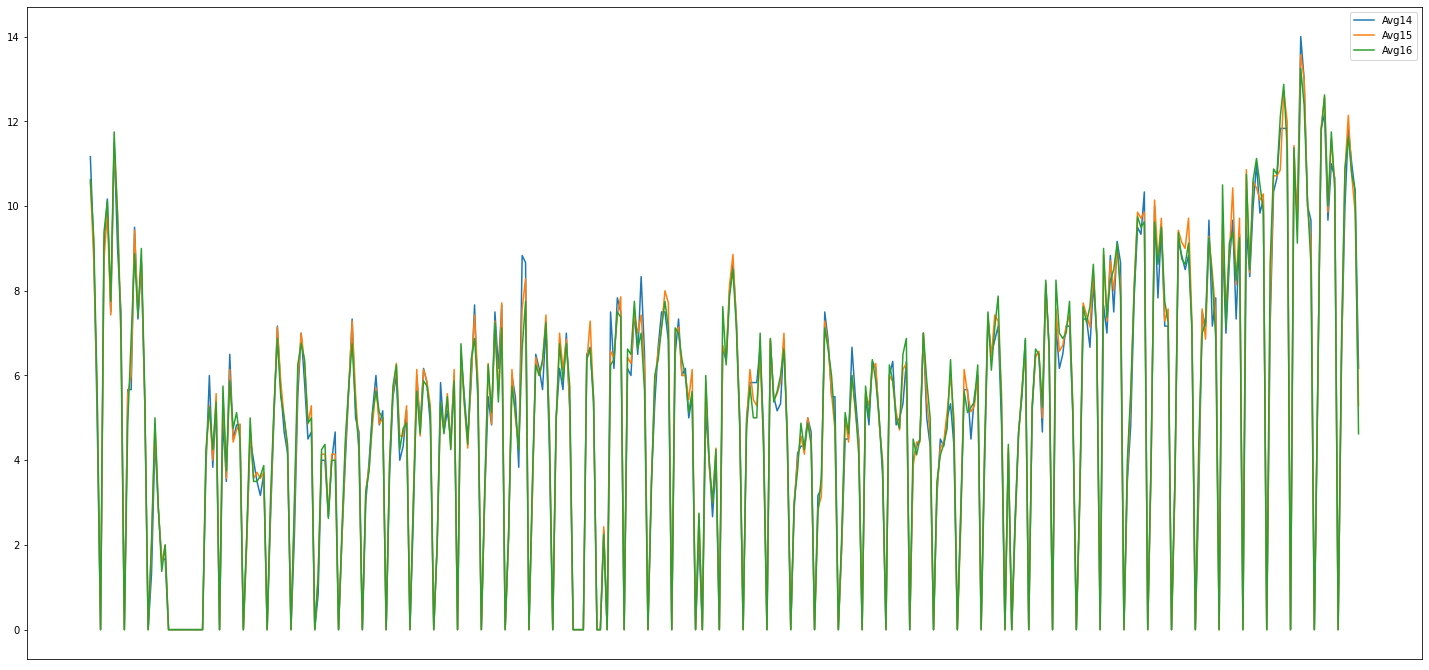

In [123]:
fig=plt.figure(figsize=(25,12))
plt.xticks(range(15,301,15),rotation=90)
plt.plot(moving_avg[['Avg14','Avg15','Avg16']])
plt.legend(['Avg14','Avg15','Avg16'])
#plt.show()

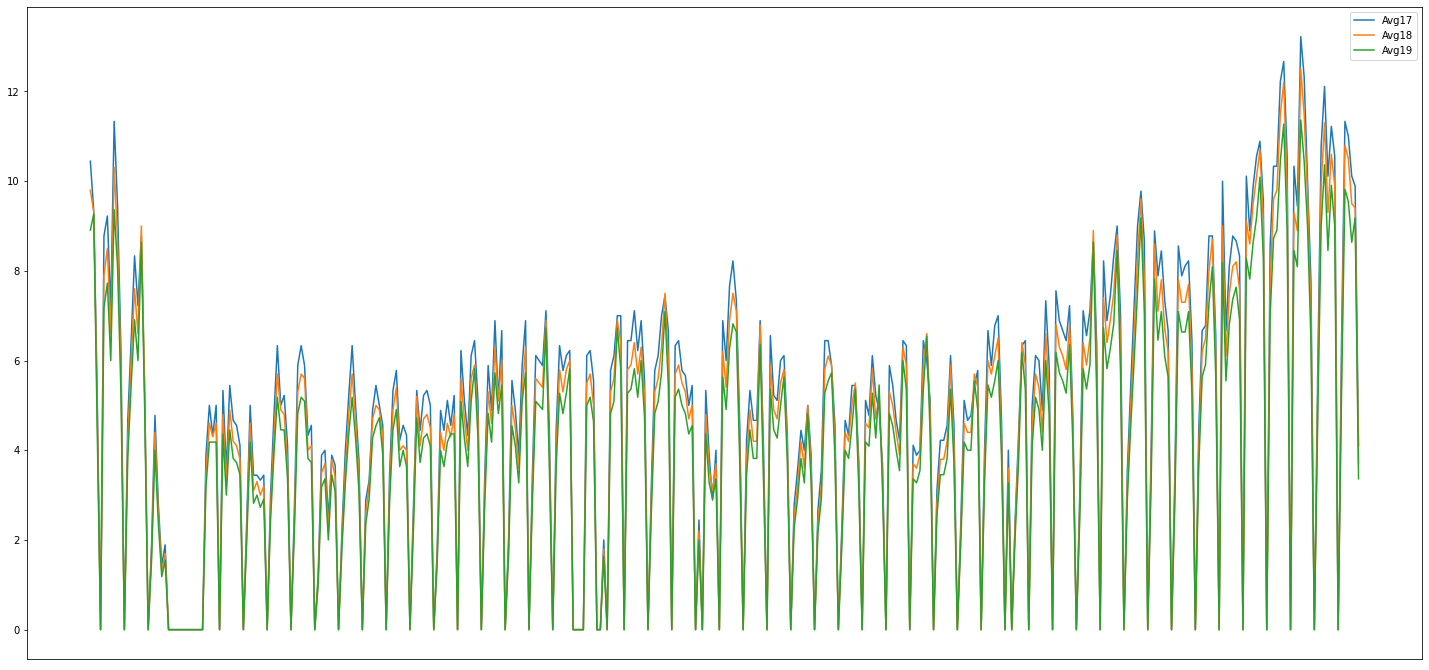

In [124]:
fig=plt.figure(figsize=(25,12))
plt.xticks(range(15,301,15),rotation=90)
plt.plot(moving_avg[['Avg17','Avg18','Avg19']])
plt.legend(['Avg17','Avg18','Avg19'])
#plt.show()

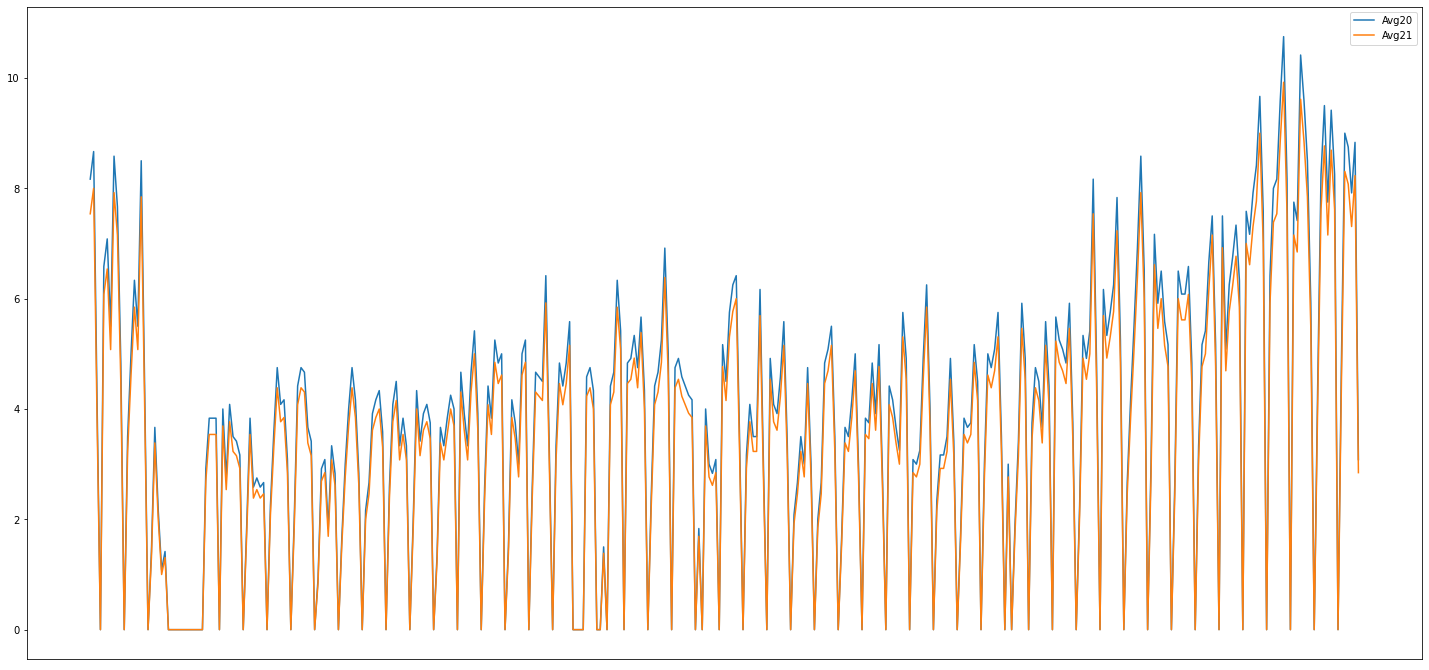

In [125]:
fig=plt.figure(figsize=(25,12))
plt.xticks(range(15,301,15),rotation=90)
plt.plot(moving_avg[['Avg20','Avg21']])
plt.legend(['Avg20','Avg21'])
#plt.show()

# Plot for daily average for different quarter:

In [126]:
data=data.set_index('Date')

In [127]:
moving_avg[data.Quarter==1]

,Avg8,Avg9,Avg10,Avg11,Avg12,Avg13,Avg14,Avg15,Avg16,Avg17,Avg18,Avg19,Avg20,Avg21
Date,,,,,,,,,,,,,,
2011-01-01,0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000
2011-01-02,0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000
2011-01-03,0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000
2011-01-04,0,0.0,0.0,2.000000,2.75,3.2,3.833333,4.142857,4.250,3.888889,3.5,3.181818,2.916667,2.692308
2011-01-05,0,0.0,1.5,3.000000,4.00,5.6,6.000000,5.285714,5.250,5.000000,4.6,4.181818,3.833333,3.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-27,0,0.0,0.0,1.666667,2.75,3.0,3.166667,3.142857,3.375,3.444444,3.1,2.818182,2.583333,2.384615
2011-03-28,1,2.0,3.5,4.000000,4.50,5.6,5.500000,6.285714,6.250,5.888889,5.3,4.818182,4.416667,4.076923
2011-03-29,0,2.0,2.0,2.666667,3.25,3.8,4.833333,4.857143,5.125,4.888889,4.6,4.181818,3.833333,3.538462


Text(0.5, 1.0, 'Quarter Wise Daily Average')

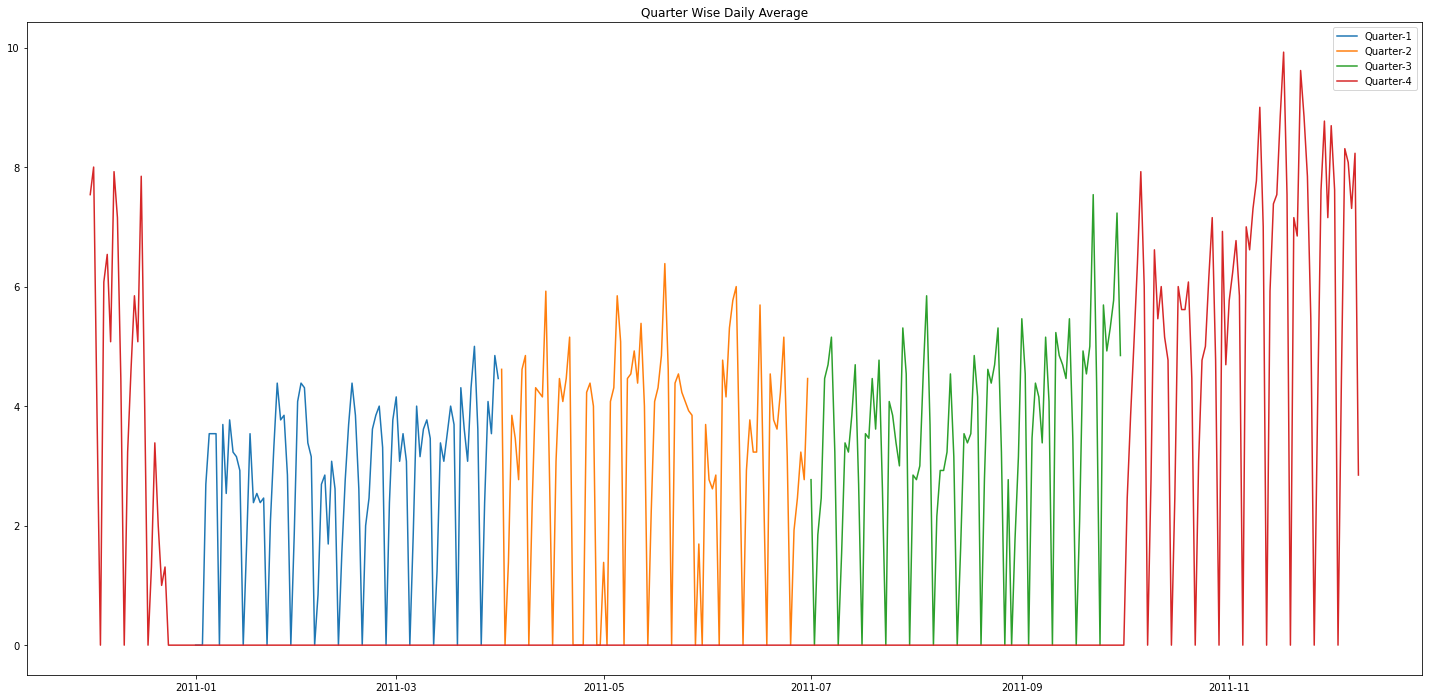

In [128]:
fig=plt.figure(figsize=(25,12))
#plt.xticks(range(3,91,3),rotation=90)
for i in range(1,5):
  plt.plot(moving_avg[data.Quarter==i][['Avg21']])
plt.legend(['Quarter-1','Quarter-2','Quarter-3','Quarter-4'])
plt.title('Quarter Wise Daily Average')
#plt.show()

# Moving average plots for daily average over different windows:


In [129]:
data

,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
Date,,,,,,,,,,,,,,,
2010-12-01,0,3,12,9,11,20,12,7,11,9,4,0,0,0,4
2010-12-02,2,3,5,10,9,14,11,7,13,10,9,9,2,0,4
2010-12-03,0,0,5,6,4,9,6,9,6,3,2,0,0,0,4
2010-12-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2010-12-05,0,0,0,8,13,17,16,7,14,4,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0,3,5,9,9,18,16,16,11,15,6,0,0,0,4
2011-12-06,0,4,6,9,17,25,10,14,8,6,6,0,0,0,4
2011-12-07,0,7,7,8,12,20,12,9,11,5,4,0,0,0,4


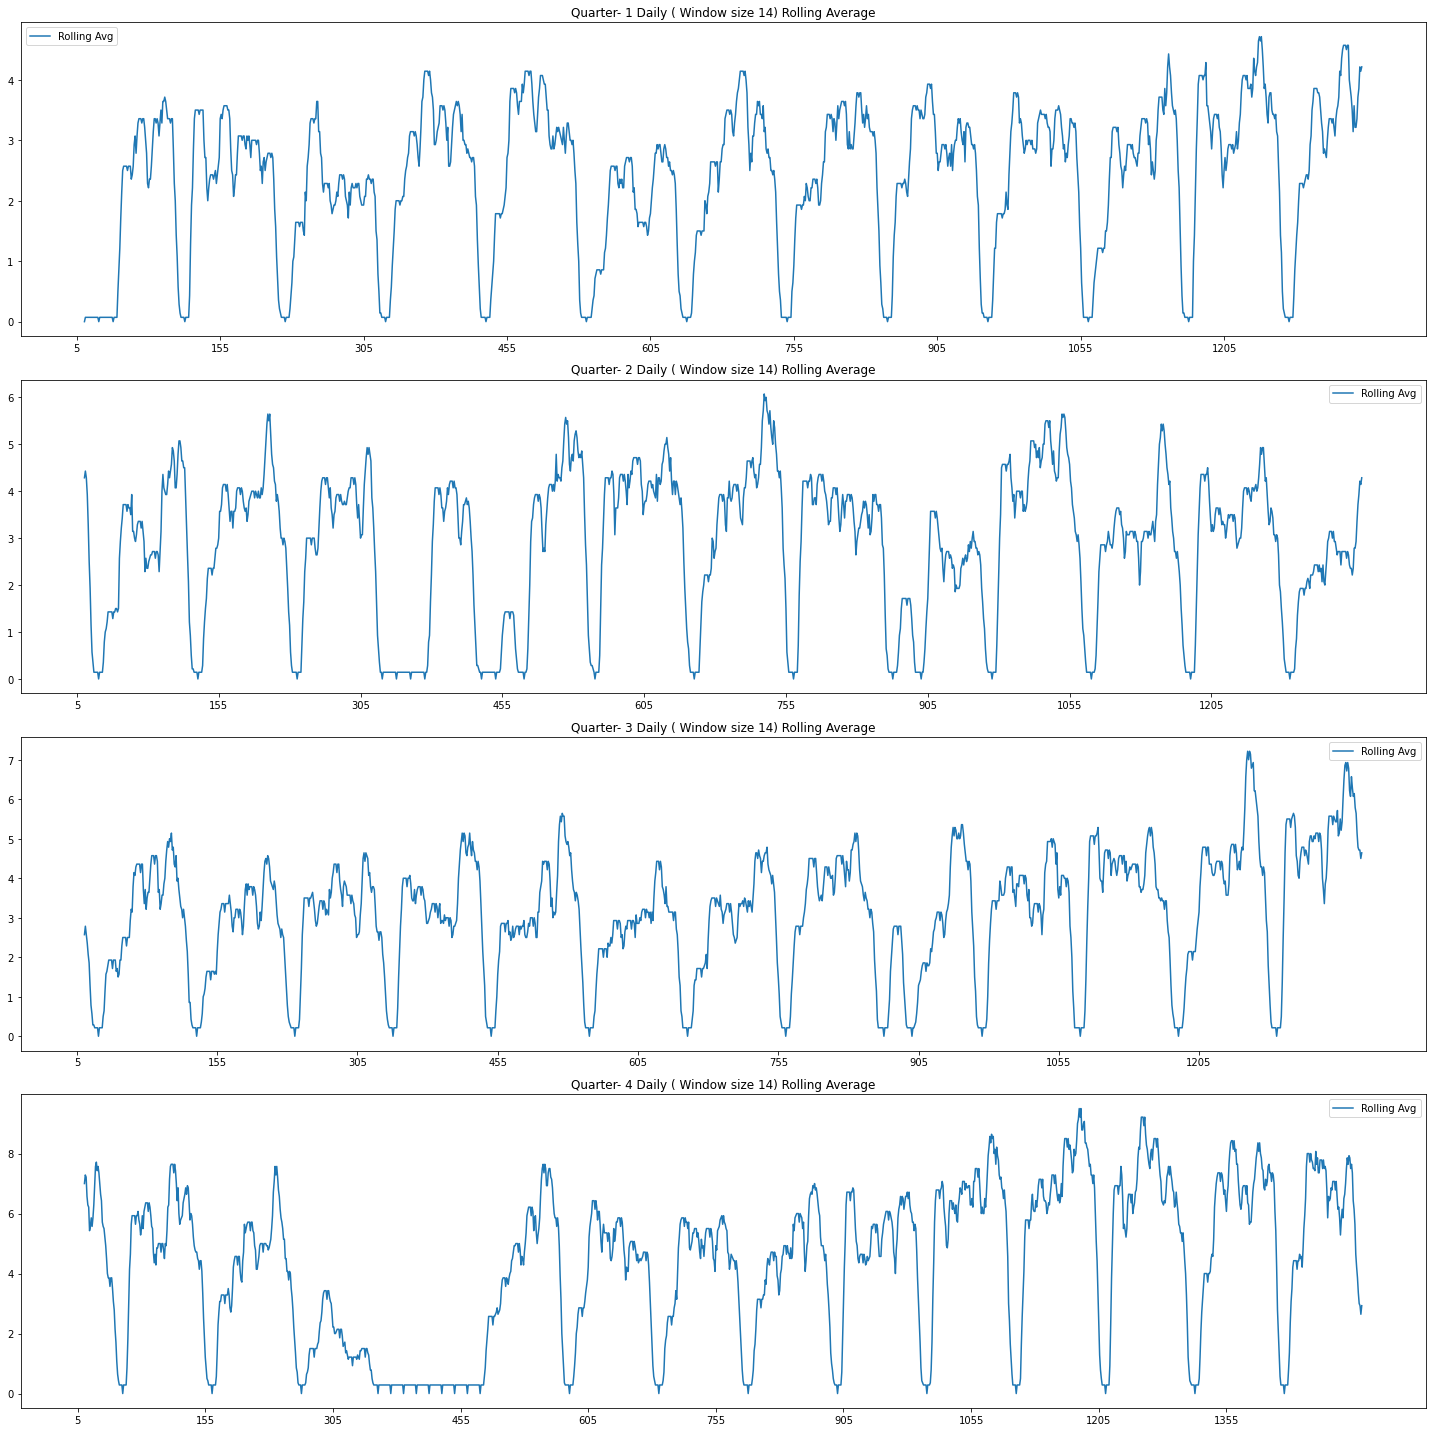

In [130]:
fig=plt.figure(figsize=(20,20))
for i in range(1,5):
  plt.subplot(4,1,i)
  Q_i=data.loc[data['Quarter']==i]

  plt.xticks(range(5,Q_i.shape[0]*14+1,150))
  #plt.plot(Q_i.stack().reset_index(drop=True)) ## Uncomment to plot the hourly count data
  plt.plot(Q_i.stack().reset_index(drop=True).rolling(window=14).mean())
  plt.legend(['Rolling Avg']) ## Comment this to plot the hourly count data
  #plt.legend(['Count','Rolling Avg']) ## Uncomment to plot the hourly count data
  plt.title('Quarter- '+str(i)+' Daily ( Window size 14) Rolling Average') # Missing dates are included as all 0s
  plt.tight_layout()
  #plt.show()

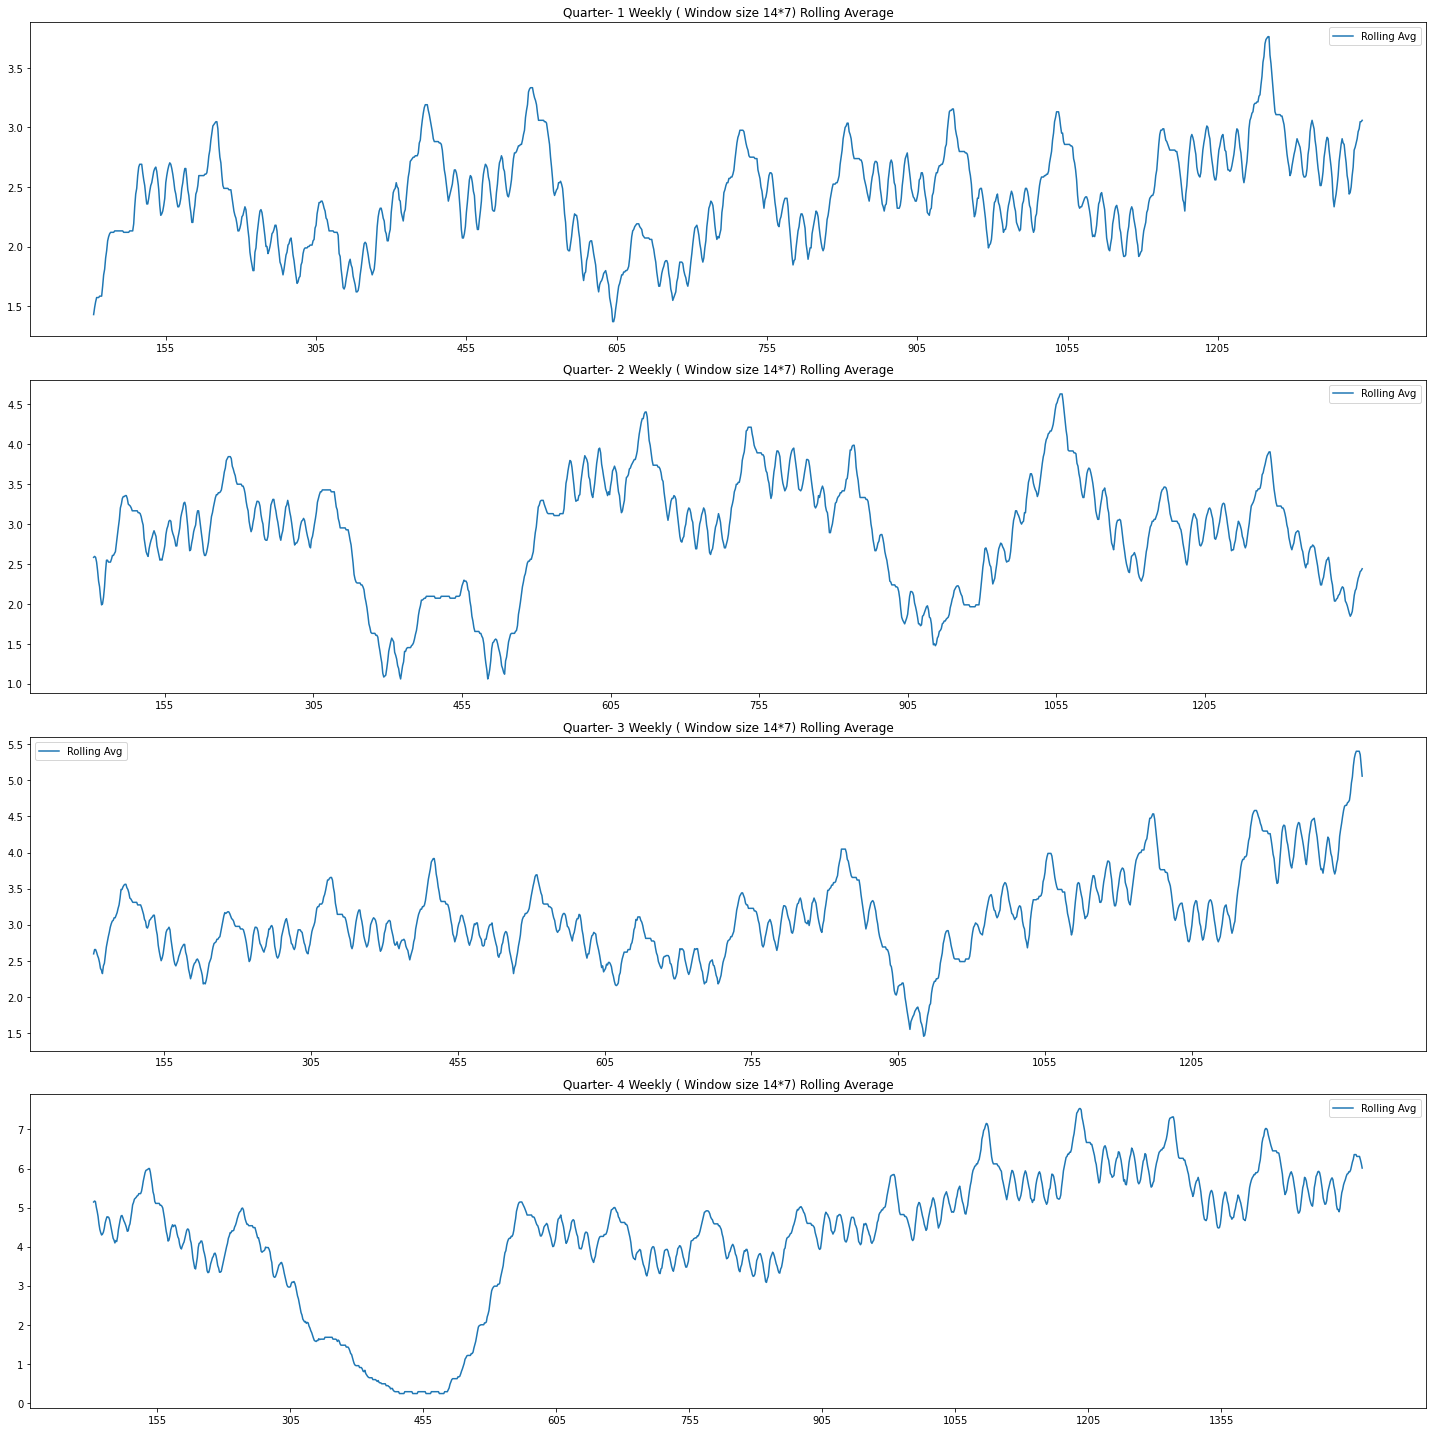

In [131]:
fig=plt.figure(figsize=(20,20))
for i in range(1,5):
  plt.subplot(4,1,i)
  Q_i=data.loc[data['Quarter']==i]

  plt.xticks(range(5,Q_i.shape[0]*14+1,150))
  #plt.plot(Q_i.stack().reset_index(drop=True)) ## Uncomment to plot the hourly count data
  plt.plot(Q_i.stack().reset_index(drop=True).rolling(window=14*6).mean())
  plt.legend(['Rolling Avg']) ## Comment this to plot the hourly count data
  #plt.legend(['Count','Rolling Avg']) ## Uncomment to plot the hourly count data
  plt.title('Quarter- '+str(i)+' Weekly ( Window size 14*7) Rolling Average') # Missing dates are included as all 0s
  plt.tight_layout()
  #plt.show()